In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Expired Loans
first analyze loans that have been completed up to Oct 2017

In [2]:
df1 = pd.read_excel('2007_2011.xlsx',sheetname='Sheet1')
df2 = pd.read_excel('2012_2013.xlsx',sheetname='Sheet1')
df3 = pd.read_excel('2014.xlsx',sheetname='Sheet1')

In [3]:
#df = pd.concat([df1,df2,df3],join='inner')
date_before_36 = datetime.date(2014,10,1)
date_before_60 = datetime.date(2012,10,1)
df2 = df2[((df2.term.str.contains('60')) & (df2.issue_d < date_before_60)) | (df2.term.str.contains('36'))]
df3 = df3[(df3.term.str.contains('36')) & (df3.issue_d < date_before_36)]
data1 = pd.concat([df1,df2,df3],join='inner')

In [4]:
data1.shape

(305347, 57)

In [5]:
data1 = data1[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate',
         'installment','grade','sub_grade','emp_title','emp_length',
         'home_ownership','annual_inc','verification_status','issue_d',
         'loan_status','purpose','title','zip_code','addr_state','dti',
        'delinq_2yrs','earliest_cr_line','open_acc','pub_rec','last_pymnt_d',
        'last_pymnt_amnt','application_type']]
data1.shape

(305347, 27)

In [6]:
data1.dropna(subset=['annual_inc','loan_status','issue_d','last_pymnt_d','loan_amnt'],
             inplace=True)

In [7]:
data1.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off',
       'Late (31-120 days)', 'Current', 'In Grace Period',
       'Late (16-30 days)', 'Default'], dtype=object)

In [8]:
#Curr = np.sum(data1.loan_status == 'Current')
Fp = np.sum(data1.loan_status.str.contains('Fully Paid'))
CO = np.sum(data1.loan_status.str.contains('Charged Off'))
#Late = np.sum(data1.loan_status.str.contains('Late'))
Default = np.sum(data1.loan_status.str.contains('Default'))

## Some Plots

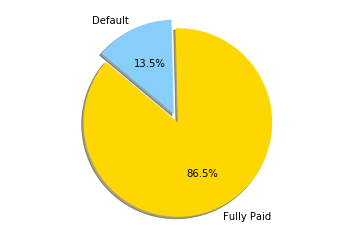

In [9]:
# Data to plot
labels = 'Fully Paid','Default'
sizes = [Fp,Default+CO]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','purple']
colors = ['gold','lightskyblue']
explode = (0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Now create labels for durations

In [10]:
data1['duration'] = (data1.last_pymnt_d - data1.issue_d) / np.timedelta64(1, 'M')

36-month duration average:  24.992492852203636
36-month duration std:  10.998982870227039
60-month duration average:  35.117040042261486
60-month duration std:  19.17702895799589


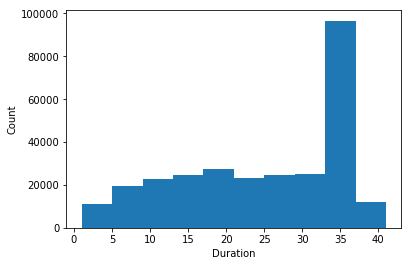

In [28]:
duration_36 = data1.duration[data1.term.str.contains('36')]
duration_60 = data1.duration[data1.term.str.contains('60')]
print('36-month duration average: ', np.mean(duration_36))
print('36-month duration std: ', np.std(duration_36))
print('60-month duration average: ', np.mean(duration_60))
print('60-month duration std: ', np.std(duration_60))
plt.hist(duration_36,bins=[1,5,9,13,17,21,25,29,33,37,41],range=(0,41))
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

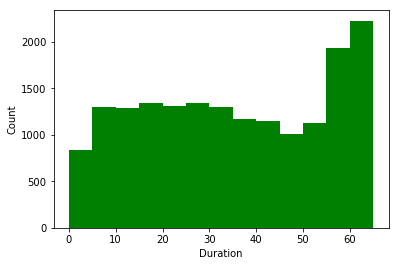

In [26]:
plt.hist(duration_60,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65],
                           range=(0,62),color='green')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [21]:
Ep = np.sum((data1.term.str.contains('36')) & (data1.duration < 36) &
             (data1.loan_status.str.contains('Fully Paid')))
Ep = Ep + np.sum((data1.term.str.contains('60')) & (data1.duration < 60) &
             (data1.loan_status.str.contains('Fully Paid')))

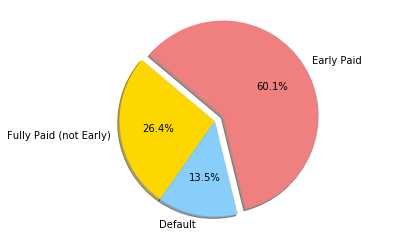

In [22]:
# Data to plot
labels = 'Fully Paid (not Early)','Default','Early Paid'
sizes = [Fp - Ep,Default+CO, Ep]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','purple']
colors = ['gold','lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

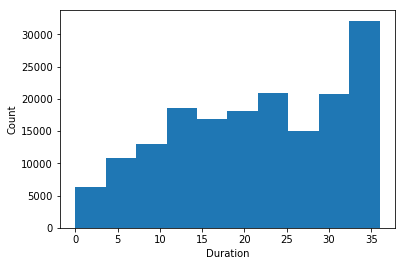

In [23]:
duration_36 = data1.duration[(data1.term.str.contains('36')) & (data1.duration < 36) &
             (data1.loan_status.str.contains('Fully Paid'))]
plt.hist(duration_36)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

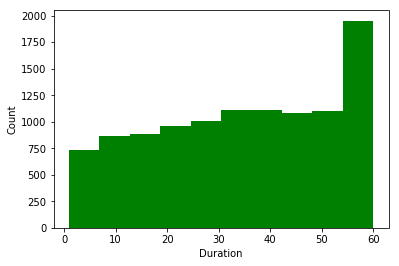

In [24]:
duration_60 = data1.duration[(data1.term.str.contains('60')) & (data1.duration < 60) &
             (data1.loan_status.str.contains('Fully Paid'))]
plt.hist(duration_60,color='green')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

In [16]:
print(np.mean(duration_36))
print(np.std(duration_36))
print(np.mean(duration_60))
print(np.std(duration_60))

21.502802664868998
10.05027827947676
34.655541540726105
17.79576640200725


## Current Loans
Now we use the data starting from 2014 to see the basic properties of current loans.

In [15]:
df1 = pd.read_excel('2014.xlsx',sheetname='Sheet1')
df2 = pd.read_excel('2015.xlsx',sheetname='Sheet1')
df3 = pd.read_excel('2016_Q1.xlsx',sheetname='Sheet1')
df4 = pd.read_excel('2016_Q2.xlsx',sheetname='Sheet1')
df5 = pd.read_excel('2016_Q3.xlsx',sheetname='Sheet1')
df6 = pd.read_excel('2016_Q4.xlsx',sheetname='Sheet1')
df7 = pd.read_excel('2017_Q1.xlsx',sheetname='Sheet1')
df8 = pd.read_excel('2017_Q2.xlsx',sheetname='Sheet1')
df9 = pd.read_excel('2017_Q3.xlsx',sheetname='Sheet1')
df1 = df1[((df1.term.str.contains('36')) & (df1.issue_d > date_before_36))
                | (df1.term.str.contains('60'))]


In [16]:
data2 = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],join='inner')
data2 = data2[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate',
         'installment','grade','sub_grade','emp_title','emp_length',
         'home_ownership','annual_inc','verification_status','issue_d',
         'loan_status','purpose','title','zip_code','addr_state','dti',
        'delinq_2yrs','earliest_cr_line','open_acc','pub_rec','last_pymnt_d',
        'last_pymnt_amnt','application_type']]
data2.dropna(subset=['annual_inc','loan_status','issue_d','last_pymnt_d','loan_amnt','int_rate','dti'],
             inplace=True)

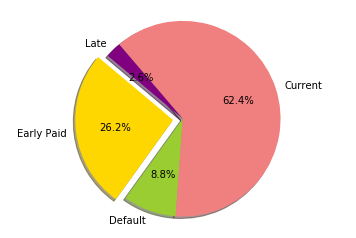

In [20]:
Curr = np.sum(data2.loan_status.str.contains('Current'))
Fp = np.sum(data2.loan_status.str.contains('Fully Paid'))
CO = np.sum(data2.loan_status.str.contains('Charged Off'))
Late = np.sum(data2.loan_status.str.contains('Late'))
Default = np.sum(data2.loan_status.str.contains('Default'))
# Data to plot
labels = 'Early Paid','Default','Current','Late'
sizes = [Fp,Default+CO, Curr, Late]
colors = ['gold', 'yellowgreen', 'lightcoral','purple']

explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

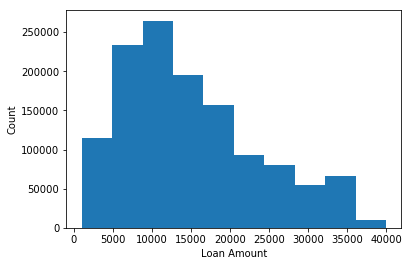

Max Loan amount: 40000
Min Loan amount: 1000
Avg Loan amount: 15134.837320826764


In [20]:
plt.hist(data2.loan_amnt)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()
print('Max Loan amount:',np.max(data2.loan_amnt))
print('Min Loan amount:',np.min(data2.loan_amnt))
print('Avg Loan amount:', np.mean(data2.loan_amnt))

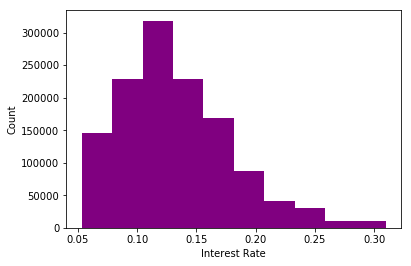

Max int_rate amount: 0.3099
Min int_rate amount: 0.0532
Avg int_rate amount: 0.1315453353694229


In [21]:
plt.hist(data2.int_rate,color='purple')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.show()
print('Max int_rate amount:',np.max(data2.int_rate))
print('Min int_rate amount:',np.min(data2.int_rate))
print('Avg int_rate amount:', np.mean(data2.int_rate))

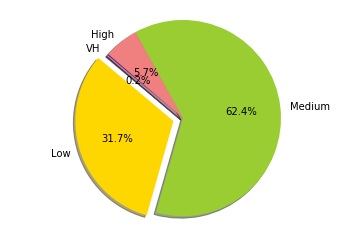

In [67]:
# Data to plot
labels = 'Low', 'Medium', 'High', 'VH'
sizes = [np.sum(df_16Q2.annual_inc <= 50000), np.sum((df_16Q2.annual_inc <= 150000) &(df_16Q2.annual_inc > 50000)), 
         np.sum((df_16Q2.annual_inc <= 500000) &(df_16Q2.annual_inc > 150000)),
         np.sum(df_16Q2.annual_inc > 500000)]
colors = ['gold', 'yellowgreen', 'lightcoral','purple']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

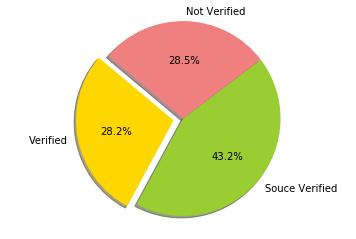

In [74]:
# Data to plot
labels = 'Verified', 'Souce Verified', 'Not Verified'
sizes = [np.sum(df_16Q2.verification_status == 'Verified'),  
         np.sum(df_16Q2.verification_status == 'Source Verified'),
         np.sum(df_16Q2.verification_status == 'Not Verified')]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

## Prediction
Features that can potentially be used for predicting early repayment / default are:
loan_amnt, term, int_rate, installment, grade(??), emp_length/title(?), home_ownership, annual_inc, verification_status, purpose, address/zipcode(?), dti, delinq_2yrs, earliest_cr_line, open_acc/total_acc(?), pub_rec, policy code(??), hardship flag